# Acoustic Wave Equation and Dispersion Reduction FD Schemes

# Stencil Test Version

Choose the Velocity Model: ptype

- ptype=1 : Homogeneous Velocity Model                 ($v_{min}=v_{max}= 3.0 Km/s$)
- ptype=2 : Heterogeneous Velocity Model               ($v_{min}=1.5 Km/s$ e $v_{max}= 5.0 Km/s$)
- ptype=3 : SEG/EAGE 2D Salt Velocity Model    ($v_{min}=1.5 Km/s$ e $v_{max}= 5.0 Km/s$)
- ptype=4 : Marmousi Velocity Model                  ($v_{min}=1.5 Km/s$ e $v_{max}= 5.0 Km/s$)

In [1]:
ptype = 1

Choose the order of spatial operator: sou 

- (Example: 2, 4, 6,...,$2k$ with $k\in\mathbb{N}$)

In [2]:
sou = 2

Escolha o o tipo de Esquema FD: npesos

- Se deseja utilizar FD Clássico                                : npesos = 0
- Se deseja habilitar a escolha de um FD com Dispesion Reduction: npesos = 1 

In [3]:
npesos = 0

Escolha a Estratégia de Redução de Dispersão: wauthor e wtype

 - wauthor = 1 (Cross-Line) -> Yang Liu - A nearly globally optimal FD scheme based on 2D time-space-domain dispersion relation  <br><br>
     - wtype = 1 -> Least Square Approach <br><br>
 
 - wauthor = 2 (Cross-Line) -> Liu and Sen - Time–space domain high-order FD method for 2D acoustic  wave equations <br><br>
     - wtype = 1 -> Taylor Expansion Approach <br><br>

 - wauthor = 3 (Cross-Rhombus) -> Wang, Liu and Sen - Effective finite-difference modelling  methods with 2-D acoustic wave equation using a combination of cross and rhombus stencils <br><br>
      - wtype = 1 -> Taylor Expansion Approach <br><br>
      - wtype = 2 -> Least Square Approach <br><br>
    
 - wauhtor = 4 -> Cross-Square <br><br>
      - wtype = 1 -> Taylor Expansion Approach <br><br>

In [4]:
wauthor = 1
wtype   = 1

Se wauhtor = 3, então escolha o gerador de pontos extras para o caso Cross-Rhombus: nvalue <= sou/2

In [5]:
nvalue = 2

extra_points_cross_rhombus = int(0.5*(nvalue-1)*nvalue)

if(nvalue>int(0.5*sou)):
    
    print('Excedeu o Número de Pontos Extras no Caso Cross-Rhombus!')

else:

    print('Número de Pontos Extras no Cross-Rhombus: %d'%extra_points_cross_rhombus)

Excedeu o Número de Pontos Extras no Caso Cross-Rhombus!


Se wauhtor = 4, então escolha o gerador de pontos extras para o caso Cross-Square: nvalue <= sou/2

In [6]:
exttrap = 3

extra_points_max_cross_square = int(0.5*(int(sou/2)**2+int(sou/2)))

if(exttrap>extra_points_max_cross_square):
    
    print('Excedeu o Número de Pontos Extras no Caso Cross-Square!')

else:

    print('Número de Pontos Extras no Cross-Square: %d'%exttrap)

Excedeu o Número de Pontos Extras no Caso Cross-Square!


In [7]:
if(wauthor==1 or wauthor==2 or wauthor==4): 
    
    nvalue = 1
    
if(wauthor==1 or wauthor==2 or wauthor==3): 
    
    exttrap                       = 1
    extra_points_max_cross_square = 1

In [8]:
#==============================================================================
# -*- encoding: utf-8 -*-
#==============================================================================

#==============================================================================
# Módulos Importados do Python / Devito / Examples
#==============================================================================

#==============================================================================
# Pyhton Modules and Imports
#==============================================================================
import numpy                   as np
import matplotlib.pyplot       as plot
import math                    as mt
import sys
import time                    as tm
import testes_opt              as ttopt
import rotinas_plot            as rplot
import macustica               as mc
import coef_opt                as copt
#==============================================================================

In [9]:
#==============================================================================
# -*- encoding: utf-8 -*-
#==============================================================================

#==============================================================================
# Módulos Importados do Python / Devito / Examples
#==============================================================================

#==============================================================================
# Pyhton Modules and Imports
#==============================================================================
import numpy                   as np
import matplotlib.pyplot       as plot
import math                    as mt
import sys
import time                    as tm
import testes_opt              as ttopt
import rotinas_plot            as rplot
import macustica               as mc
import coef_opt                as copt
#==============================================================================

In [10]:
#==============================================================================
# Devito Imports
#==============================================================================
from devito import *
#==============================================================================

#==============================================================================
# Devito Examples Imports
#==============================================================================
from   examples.seismic        import TimeAxis
from   examples.seismic        import RickerSource
from   examples.seismic        import Receiver
configuration['log-level']='ERROR'
#==============================================================================

In [11]:
#==============================================================================
plot.close("all")
#==============================================================================

In [12]:
#==============================================================================
# Testes de Leitura de Dados
#==============================================================================
if(ptype==1): teste = ttopt.teste1
if(ptype==2): teste = ttopt.teste2
if(ptype==3): teste = ttopt.teste3
if(ptype==4): teste = ttopt.teste4
    
MV    = mc.acusdevito(teste)
coef1 = copt.coefopt1(teste,MV)
#==============================================================================

In [13]:
#==============================================================================
# Novos Parâmetros
#==============================================================================
teste.sou        = sou
teste.npesos     = npesos
teste.wauthor    = wauthor
teste.wtype      = wtype
teste.nvalue     = nvalue
teste.exttrap    = exttrap
teste.exttrapmax = extra_points_max_cross_square
#==============================================================================

In [14]:
#==============================================================================
# Obtenção de Parâmetros
#==============================================================================
nptx       = teste.nptx       # Número de Pontos Direção X
npty       = teste.npty       # Número de Pontos Direção Y
x0         = teste.x0         # Ponto Inicial da Malha X
y0         = teste.y0         # Ponto Inicial da Malha Y
compx      = teste.compx      # Comprimento Domínio em X
compy      = teste.compy      # Comprimento Domínio em Y 
hxv        = teste.hx         # Delta x
hyv        = teste.hy         # Delta y
t0         = teste.t0         # Tempo Inicial da Simulação em Milisegundos
tn         = teste.tn         # Tempo Final da Simulação em Milisegundos
f0         = teste.f0         # Frequência da Fonte em Khz
nfonte     = teste.nfonte     # Número de Fontes
xposf      = teste.xposf      # Posição da Fonte em X
yposf      = teste.yposf      # Posição da Fonte em Y
nrec       = teste.nrec       # Número de Receivers
nxpos      = teste.nxpos      # Posição dos Receivers em X
nypos      = teste.nypos      # Posição dos Receivers em Y
CFL        = teste.CFL        # Constante de Estabilidade
v          = MV.C0a           # Matriz de Velocidade
tou        = teste.tou        # Time Order Displacement 
npesos     = teste.npesos     # Allow Different Weights
wauthor    = teste.wauthor    # Weight's Author
wtype      = teste.wtype      # Weight Type  
sou        = teste.sou        # Space Order Displacement     
nvalue     = teste.nvalue     # Second Parameter for Stencils
exttrapmax = teste.exttrapmax # Total Number of Extra Points
exttrap    = teste.exttrap    # Choosed Number of Extra Points
btype      = teste.btype      # Boundary Type
ftype      = teste.ftype      # Source type  
#==============================================================================

In [15]:
#==============================================================================
# Definição de Vetores Devito
#==============================================================================
origin  = (x0,y0)       
extent  = (compx,compy)
shape   = (nptx,npty)   
spacing = (hxv,hyv)     

class d0domain(SubDomain):
    name = 'd0'
    def define(self, dimensions):
        x, y = dimensions
        return {x: x, y: y}
d0_domain = d0domain()
    
grid = Grid(origin=origin,extent=extent,shape=shape,subdomains=(d0_domain),dtype=np.float64)
#==============================================================================

In [16]:
#==============================================================================
# Construção da Malha Temporal
#==============================================================================
vmax  = np.around(np.amax(v),1) 
dtmax = (min(hxv,hyv)*CFL)/(vmax)
dtmax = np.round(dtmax,8)
ntmax = int((tn-t0)/dtmax)
dt0   = (tn-t0)/(ntmax)
time_range = TimeAxis(start=t0,stop=tn,num=ntmax+1)
nt         = time_range.num - 1
#==============================================================================

In [17]:
#==============================================================================
# Variváveis Simbólicas
#==============================================================================
(hx,hy)    = grid.spacing_map  
(x, y)     = grid.dimensions    
time       = grid.time_dim     
t          = grid.stepping_dim 
dt         = grid.stepping_dim.spacing
#==============================================================================

In [18]:
#==============================================================================
# Construção e Posicionamento da Fonte
#==============================================================================
src = RickerSource(name='src',grid=grid,f0=f0,npoint=nfonte,time_range=time_range,staggered=NODE,dtype=np.float64)
src.coordinates.data[:, 0] = xposf
src.coordinates.data[:, 1] = yposf
#==============================================================================

In [19]:
#==============================================================================
# Construção e Posicionamento dos Receivers
#==============================================================================
rec = Receiver(name='rec',grid=grid,npoint=nrec,time_range=time_range,staggered=NODE,dtype=np.float64)
rec.coordinates.data[:, 0] = nxpos
rec.coordinates.data[:, 1] = nypos
#==============================================================================

In [20]:
#==============================================================================
# Construção da Equação da Onda com Termo de Fonte
#==============================================================================
u = TimeFunction(name="u",grid=grid,time_order=tou,space_order=sou,staggered=NODE,dtype=np.float64)

vel = Function(name="vel",grid=grid,space_order=2,staggered=NODE,dtype=np.float64)
vel.data[:,:] = v[:,:]

src_term = src.inject(field=u.forward,expr=src*dt**2*vel**2)
rec_term = rec.interpolate(expr=u)

if(npesos==0):

    pde0     = Eq(u.dt2 - u.laplace*vel*vel)
    stencil0 = Eq(u.forward, solve(pde0,u.forward),subdomain = grid.subdomains['d0'])
    print('Devito Stencil')

if(npesos==1):

    try: 
        
        if(wauthor!=4): mcoef = np.load("stencil_save/mcoef_%d%d%d%d%d%f%f%f%f.npy"%(npesos,wauthor,wtype,int(sou/2),nvalue,hxv,hyv,dt0,vmax))
        if(wauthor==4): mcoef = np.load("stencil_save/mcoef_%d%d%d%d%d%f%f%f%f.npy"%(npesos,wauthor,wtype,int(sou/2),exttrap,hxv,hyv,dt0,vmax))
        print('Read Memorized Stencil')
            
    except:
        
        Txx,Tyy,mcoef = coef1.calccoef(wauthor,wtype,sou,nvalue,vmax,dt0)    
        if(wauthor!=4): np.save("stencil_save/mcoef_%d%d%d%d%d%f%f%f%f"%(npesos,wauthor,wtype,int(sou/2),nvalue,hxv,hyv,dt0,vmax),mcoef)
        if(wauthor==4): np.save("stencil_save/mcoef_%d%d%d%d%d%f%f%f%f"%(npesos,wauthor,wtype,int(sou/2),exttrap,hxv,hyv,dt0,vmax),mcoef)
        print('Calcualte a New Stencil')

    new_laplace, contcoef = coef1.eqconstuct1(mcoef,u,t,x,y)
    pde0                  = Eq(u.dt2 - new_laplace*vel*vel)
    stencil0              = Eq(u.forward, solve(pde0,u.forward),subdomain = grid.subdomains['d0'])
#==============================================================================

Devito Stencil


In [21]:
if(npesos==1):
    print('Dispersion Reduction Stencil Weights')
    print('')
    print(mcoef)
    print('')

In [22]:
#==============================================================================
# Construção do Operador de Solução
#==============================================================================
if(btype==1):

    bc = [Eq(u[t+1,0,y],0.),Eq(u[t+1,nptx-1,y],0.),Eq(u[t+1,x,0],0.),Eq(u[t+1,x,npty-1],0.)]
    op = Operator([stencil0] + src_term + bc + rec_term,subs=grid.spacing_map)

if(btype==2):

    bc  = [Eq(u[t+1,0,y],0.),Eq(u[t+1,nptx-1,y],0.),Eq(u[t+1,x,npty-1],0.)]
    bc1 = [Eq(u[t+1,x,-k],u[t+1,x,k]) for k in range(1,int(sou/2)+1)]
    op  = Operator([stencil0] + src_term + bc + bc1 + rec_term,subs=grid.spacing_map)

if(btype==3):

    bc = [Eq(u[t+1,x,-k],u[t+1,x,npty-1-k])      for k in range(0,int(sou/2)+1)]
    bc = bc + [Eq(u[t+1,x,npty-1+k],u[t+1,x,k])  for k in range(0,int(sou/2)+1)]
    bc = bc + [Eq(u[t+1,-k,y],u[t+1,nptx-1-k,y]) for k in range(0,int(sou/2)+1)]
    bc = bc + [Eq(u[t+1,nptx-1+k,y],u[t+1,k,y])  for k in range(0,int(sou/2)+1)]
    op = Operator([stencil0] + src_term + bc + rec_term,subs=grid.spacing_map)

u.data[:] = 0.0

start = tm.time()
op(time=nt,dt=dt0)
end   = tm.time()
time_exec = end - start
#==============================================================================

In [23]:
#==============================================================================
print('Problem =  %d'%(ptype))
print('hx = %.2f - hy = %.2f - dt = %.2f - nt = %d - vmax = %.2f'%(hxv,hyv,dt0,nt,vmax))
#==============================================================================

Problem =  1
hx = 30.00 - hy = 30.00 - dt = 0.50 - nt = 1800 - vmax = 3.00


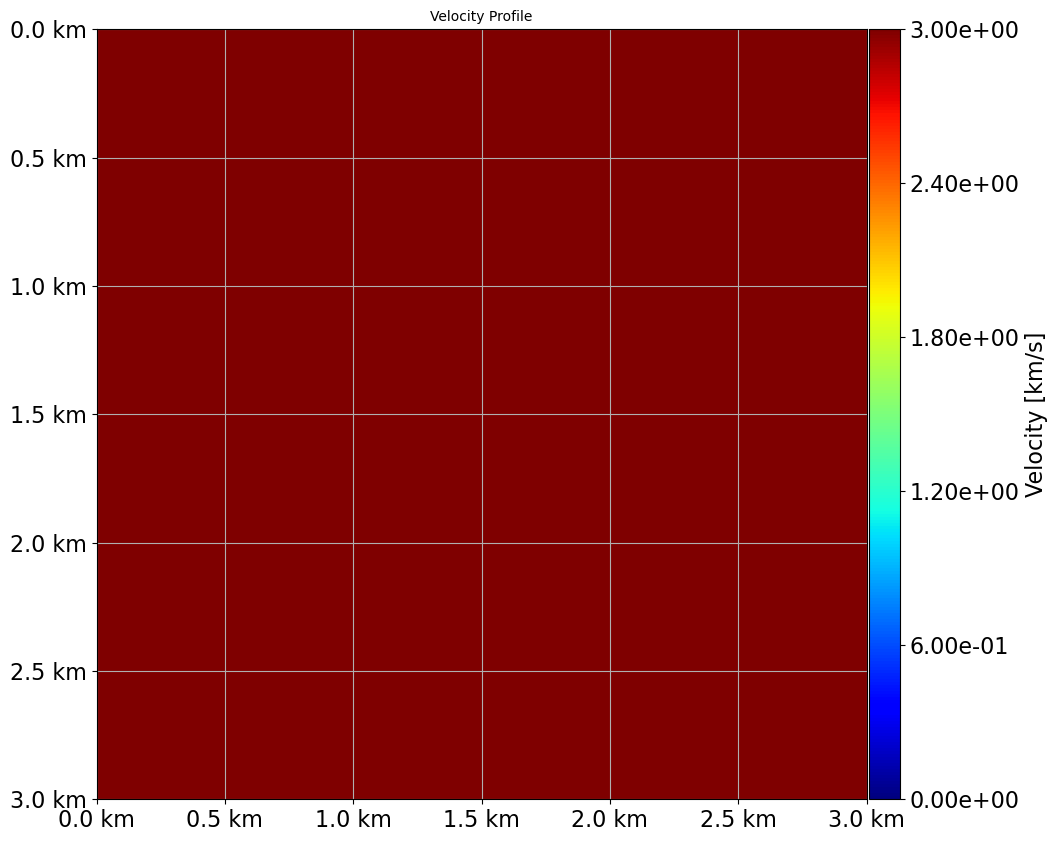

In [24]:
#==============================================================================
# Plots de Interesse
#==============================================================================
V1 = rplot.graph2dvel(v,teste)
#==============================================================================

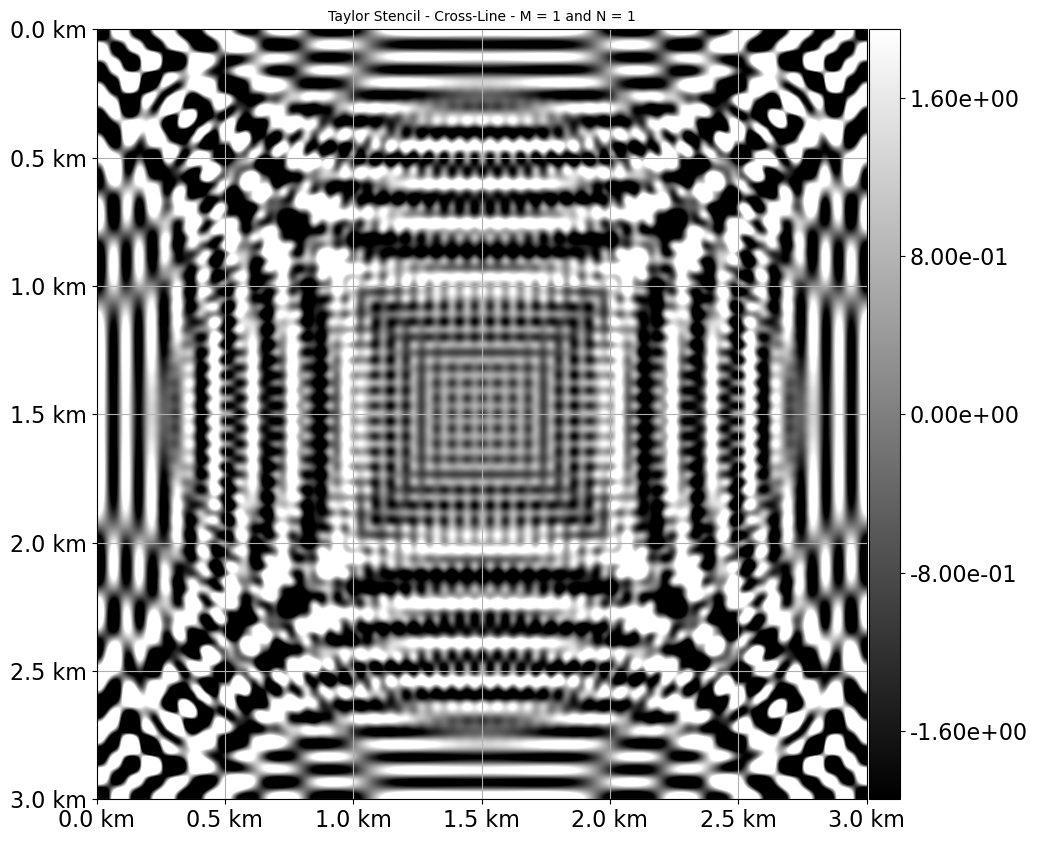

In [25]:
#==============================================================================
# Plots de Interesse
#==============================================================================
G1 = rplot.graph2d(u.data[0,:,:],teste)
#==============================================================================

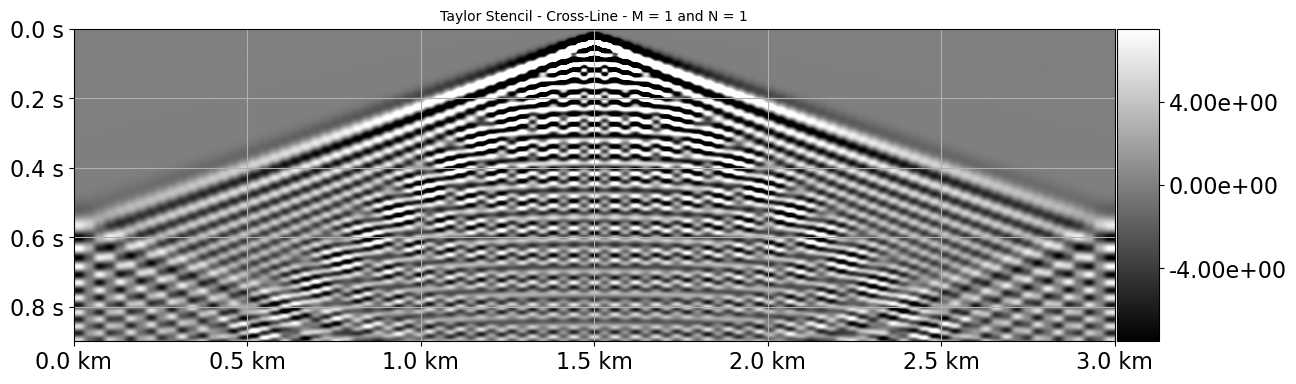

In [26]:
#==============================================================================
# Plots de Interesse
#==============================================================================
R1 = rplot.graph2drec(rec.data,teste)
#==============================================================================

In [27]:
#==============================================================================
print("Tempo de Execuação da Referencia = %.3f s" %time_exec)
#==============================================================================

Tempo de Execuação da Referencia = 0.214 s
